In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [3]:
raw_data = pd.read_csv(data_url)
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
244                                           NaN             Timor-Leste   
245                                           NaN                    Togo   
246                                           NaN     Trinidad and Tobago   
247                                           NaN                 Tunisia   
248                                           NaN                  Turkey   
249                                           NaN                      US   
250                                           NaN                  Uganda   
251                                           NaN                 Ukraine   
252                                           NaN    United Arab Emirates   
253                                      Anguilla          United Kingdom   
254                                       Bermuda          United Kingdom   
255                        British Virgin Islands          United Kingdom   
256                                Cayman Islands          United Kingdom   
257                               Channel Islands          United Kingdom   
258                   Falkland Islands (Malvinas)          United Kingdom   
259                                     Gibraltar          United Kingdom   
260                                   Isle of Man          United Kingdom   
261                                    Montserrat          United Kingdom   
262  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
263                      Turks and Caicos Islands          United Kingdom   
264                            

On remplace `NaN` par `'0'`.

In [4]:
data = raw_data.fillna('0').copy()

Nous pouvons récupérer les données en regardant si la ligne `"Province/State"=='0'`.

In [5]:
data[data["Country/Region"]=="France"][data[data["Country/Region"]=="France"]["Province/State"]=='0']

Province/State Country/Region      Lat    Long  1/22/20  1/23/20  1/24/20  \
129              0         France  46.2276  2.2137        0        0        2   

     1/25/20  1/26/20  1/27/20   ...     2/14/21  2/15/21  2/16/21  2/17/21  \
129        3        3        3   ...     3447518  3451894  3471268  3495775   

     2/18/21  2/19/21  2/20/21  2/21/21  2/22/21  2/23/21  
129  3517177  3541282  3562707  3584326  3588972  3608271  

[1 rows x 403 columns]

Les données commencent à partir de 5e colonne.

In [6]:
list_countries = ["Belgium", "France", "Germany", "Iran", "Italy", "Japan", "Korea, South",
                  "Netherlands", "Portugal", "Spain", "United Kingdom", "US"]

In [7]:
donnees = []
for c in list_countries:
    donnees.append(np.array(data[data["Country/Region"]==c][data[data["Country/Region"]==c]["Province/State"]=='0'].iloc[0,4:]))

In [8]:
assert len(donnees) == len(list_countries)

In [9]:
hong_kong = raw_data[raw_data["Province/State"]=="Hong Kong"]

In [10]:
hong_kong

Province/State Country/Region   Lat   Long  1/22/20  1/23/20  1/24/20  \
70      Hong Kong          China  22.3  114.2        0        2        2   

    1/25/20  1/26/20  1/27/20   ...     2/14/21  2/15/21  2/16/21  2/17/21  \
70        5        8        8   ...       10779    10788    10796    10812   

    2/18/21  2/19/21  2/20/21  2/21/21  2/22/21  2/23/21  
70    10820    10833    10848    10868    10884    10896  

[1 rows x 403 columns]

In [11]:
donnees.append(np.array(hong_kong.iloc[0, 4:]))
list_countries.append("Hong Kong")

On prépare les données pour la Chine.

In [12]:
data[data["Country/Region"]=="China"][data[data["Country/Region"]=="China"]["Province/State"]!="Hong Kong"]

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.226        1        9   
59         Beijing          China  40.1824  116.414       14       22   
60       Chongqing          China  30.0572  107.874        6        9   
61          Fujian          China  26.0789  117.987        1        5   
62           Gansu          China  35.7518  104.286        0        2   
63       Guangdong          China  23.3417  113.424       26       32   
64         Guangxi          China  23.8298  108.788        2        5   
65         Guizhou          China  26.8154  106.875        1        3   
66          Hainan          China  19.1959  109.745        4        5   
67           Hebei          China   39.549  116.131        1        1   
68    Heilongjiang          China   47.862  127.761        0        2   
69           Henan          China  37.8957  114.904        5        5   
71           Hubei          China  30.9756  112.271      444      444   
72           Hunan          China  27.6104  111.709        4        9   
73  Inner Mongolia          China  44.0935  113.945        0        0   
74         Jiangsu          China  32.9711  119.455        1        5   
75         Jiangxi          China   27.614  115.722        2        7   
76           Jilin          China  43.6661  126.192        0        1   
77        Liaoning          China  41.2956  122.609        2        3   
78           Macau          China  22.1667   113.55        1        2   
79         Ningxia          China  37.2692  106.165        1        1   
80         Qinghai          China  35.7452  95.9956        0        0   
81         Shaanxi          China  35.1917   108.87        0        3   
82        Shandong          China  36.3427   118.15        2        6   
83        Shanghai          China   31.202  121.449        9       16   
84          Shanxi          China  37.5777  112.292        1        1   
85         Sichuan          China  30.6171   102.71        5        8   
86         Tianjin          China  39.3054  117.323        4        4   
87           Tibet          China  31.6927  88.0924        0        0   
88        Xinjiang          China  41.1129  85.2401        0        2   
89          Yunnan          China   24.974  101.487        1        2   
90        Zhejiang          China  29.1832  120.093       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20   ...     2/14/21  2/15/21  2/16/21  \
58       15       39       60       70   ...         994      994      994   
59       36       41       68       80   ...        1046     1046     1046   
60       27       57       75      110   ...         591      591      591   
61       10       18       35       59   ...         548      548      548   
62        2        4        7       14   ...         187      187      187   
63       53       78      111      151   ...        2163     2171     2177   
64       23       23       36       46   ...         267      267      267   
65        3        4        5        7   ...         147      147      147   
66        8       19       22       33   ...         171      171      171   
67        2        8       13       18   ...        1317     1317     1317   
68        4        9       15       21   ...        1609     1609     1609   
69        9       32       83      128   ...        1304     1304     1304   
71      549      761     1058     1423   ...       68150    68150    68150   
72       24       43       69      100   ...        1033     1033     1033   
73        1        7        7       11   ...         367      367      367   
74        9       18       33       47   ...         703      703      703   
75       18       18       36       72   ...         935      935      935   
76        3        4        4        6   ...         573      573      573   
77        4       17       21       27   ...         404      404      404   
78        2        2        5     

In [13]:
china = np.array(data[data["Country/Region"]=="China"][data[data["Country/Region"]=="China"]["Province/State"]!="Hong Kong"].iloc[:, 4:])

`china` doit avoir un `shape`: (32, 399)

In [14]:
assert china.shape == (32, 399)

Nous pouvons faire la somme sur les provinces pour avoir les données du pays.

In [15]:
donnees.append(np.sum(china, axis=0))
list_countries.append("China")

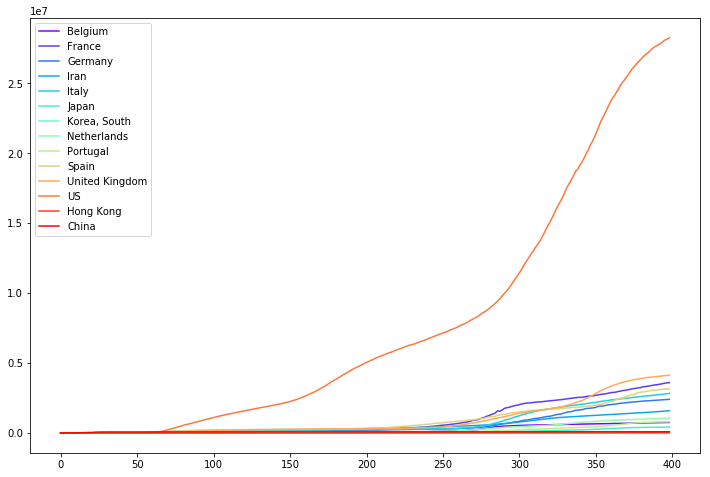

In [16]:
color=plt.cm.rainbow(np.linspace(0,1,len(list_countries)))

plt.figure(figsize=(12, 8))
for i, c in enumerate(list_countries):
    plt.plot(donnees[i], label=c, c=color[i])
plt.legend(loc='best');

Ici, les cases covid aux Etats-Unis sont très forts! Nous allons éliminer la courbe de US pour zoomer sur les autres pays.

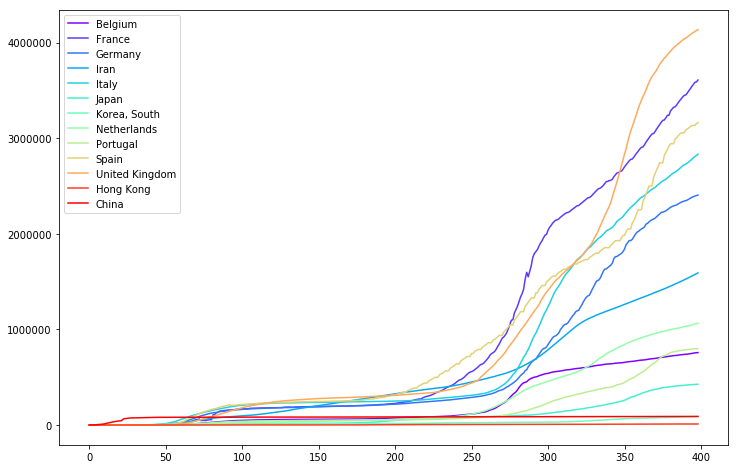

In [17]:
color=plt.cm.rainbow(np.linspace(0,1,len(list_countries)))

plt.figure(figsize=(12, 8))
for i, c in enumerate(list_countries):
    if c != "US":
        plt.plot(donnees[i], label=c, c=color[i])
plt.legend(loc='best');